In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv("/home/andreas/Desktop/Cyberlens/Pre-interview_assessment/vulnerable_robot_challenge.csv")
# df.head()
# df.iloc[:,:-1]
df.mean()
normal = df.loc[df['flag']==1,:]
normal.mean()

t                  173.063281
CPU                 18.942756
RxKBTot           4333.229184
TxKBTot            244.369484
WriteKBTot           1.369172
Watts               87.776590
Amps                 0.566919
RMS                  0.159151
diff_encoder_l      14.446373
flag                 1.000000
dtype: float64

In [3]:
anomaly = df.loc[df['flag'] == 1, :]
anomaly.head()
# anomaly.iloc[:,:-1]

,t,CPU,RxKBTot,TxKBTot,WriteKBTot,Watts,Amps,RMS,diff_encoder_l,flag
489,122.00,27.0,1.0,1.0,0.0,83.8,0.536,0.159593,11.466667,1
490,122.02,27.0,1.0,1.0,0.0,83.8,0.536,0.176595,11.133335,1
491,122.04,27.0,1.0,1.0,0.0,83.8,0.536,0.137346,14.999965,1
492,122.06,27.0,1.0,1.0,0.0,83.8,0.536,0.111644,20.333362,1
493,122.08,27.0,1.0,1.0,0.0,83.8,0.536,0.061009,13.666689,1


In [4]:
anomaly.iloc[:,[0,1,2,3,4,5,6,7,8]].corr()

,t,CPU,RxKBTot,TxKBTot,WriteKBTot,Watts,Amps,RMS,diff_encoder_l
t,1.000000,-0.161146,0.199211,0.206434,0.069923,-0.000539,0.083194,-0.168571,0.135532
CPU,-0.161146,1.000000,-0.923299,-0.916007,-0.130770,-0.646737,-0.428770,0.214333,-0.137325
RxKBTot,0.199211,-0.923299,1.000000,0.998408,0.150313,0.674279,0.444559,-0.214773,0.150888
TxKBTot,0.206434,-0.916007,0.998408,1.000000,0.142253,0.670068,0.440350,-0.213833,0.148130
WriteKBTot,0.069923,-0.130770,0.150313,0.142253,1.000000,0.051024,-0.070839,-0.015325,0.043940
Watts,-0.000539,-0.646737,0.674279,0.670068,0.051024,1.000000,0.720115,-0.059576,0.320482
Amps,0.083194,-0.428770,0.444559,0.440350,-0.070839,0.720115,1.000000,0.018692,0.195586
RMS,-0.168571,0.214333,-0.214773,-0.213833,-0.015325,-0.059576,0.018692,1.000000,0.039527
diff_encoder_l,0.135532,-0.137325,0.150888,0.148130,0.043940,0.320482,0.195586,0.039527,1.000000


In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy.stats.mstats import winsorize
columns = [0, 1, 2, 3, 5]

Data_norm = MinMaxScaler().fit_transform(df.iloc[:,:-1])
Data_norm = pd.DataFrame(Data_norm)
Data_norm['flag'] = df['flag']
normal = Data_norm.loc[Data_norm['flag'] == 0, :]
anomaly2 = Data_norm.loc[Data_norm['flag'] == 1, :]

# Data = Data_norm.sample(frac = .2, random_state = 42)
X = anomaly2.loc[:,columns]
y = anomaly2['flag']
print(X.shape)


from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import seaborn as sns


kmeans_model_1 = KMeans(n_clusters=3,random_state=123)
distances_1 = kmeans_model_1.fit_transform(X)
labels_1 = kmeans_model_1.labels_

anomaly['label'] = labels_1
anomaly

(4804, 5)


<ipython-input-5-f93dbff0ab8f>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anomaly['label'] = labels_1


,t,CPU,RxKBTot,TxKBTot,WriteKBTot,Watts,Amps,RMS,diff_encoder_l,flag,label
489,122.00,27.0,1.0,1.0,0.00,83.800000,0.536000,0.159593,11.466667,1,2
490,122.02,27.0,1.0,1.0,0.00,83.800000,0.536000,0.176595,11.133335,1,2
491,122.04,27.0,1.0,1.0,0.00,83.800000,0.536000,0.137346,14.999965,1,2
492,122.06,27.0,1.0,1.0,0.00,83.800000,0.536000,0.111644,20.333362,1,2
493,122.08,27.0,1.0,1.0,0.00,83.800000,0.536000,0.061009,13.666689,1,2
...,...,...,...,...,...,...,...,...,...,...,...
8242,214.92,26.0,0.0,0.0,3.68,79.634397,0.595005,0.076474,25.066667,1,0
8243,214.94,26.0,0.0,0.0,3.76,79.640379,0.590658,0.052720,25.733335,1,0
8244,214.96,26.0,0.0,0.0,3.84,79.646361,0.586311,0.107017,25.612903,1,0
8245,214.98,26.0,0.0,0.0,3.92,79.652343,0.581964,0.139725,25.033330,1,0


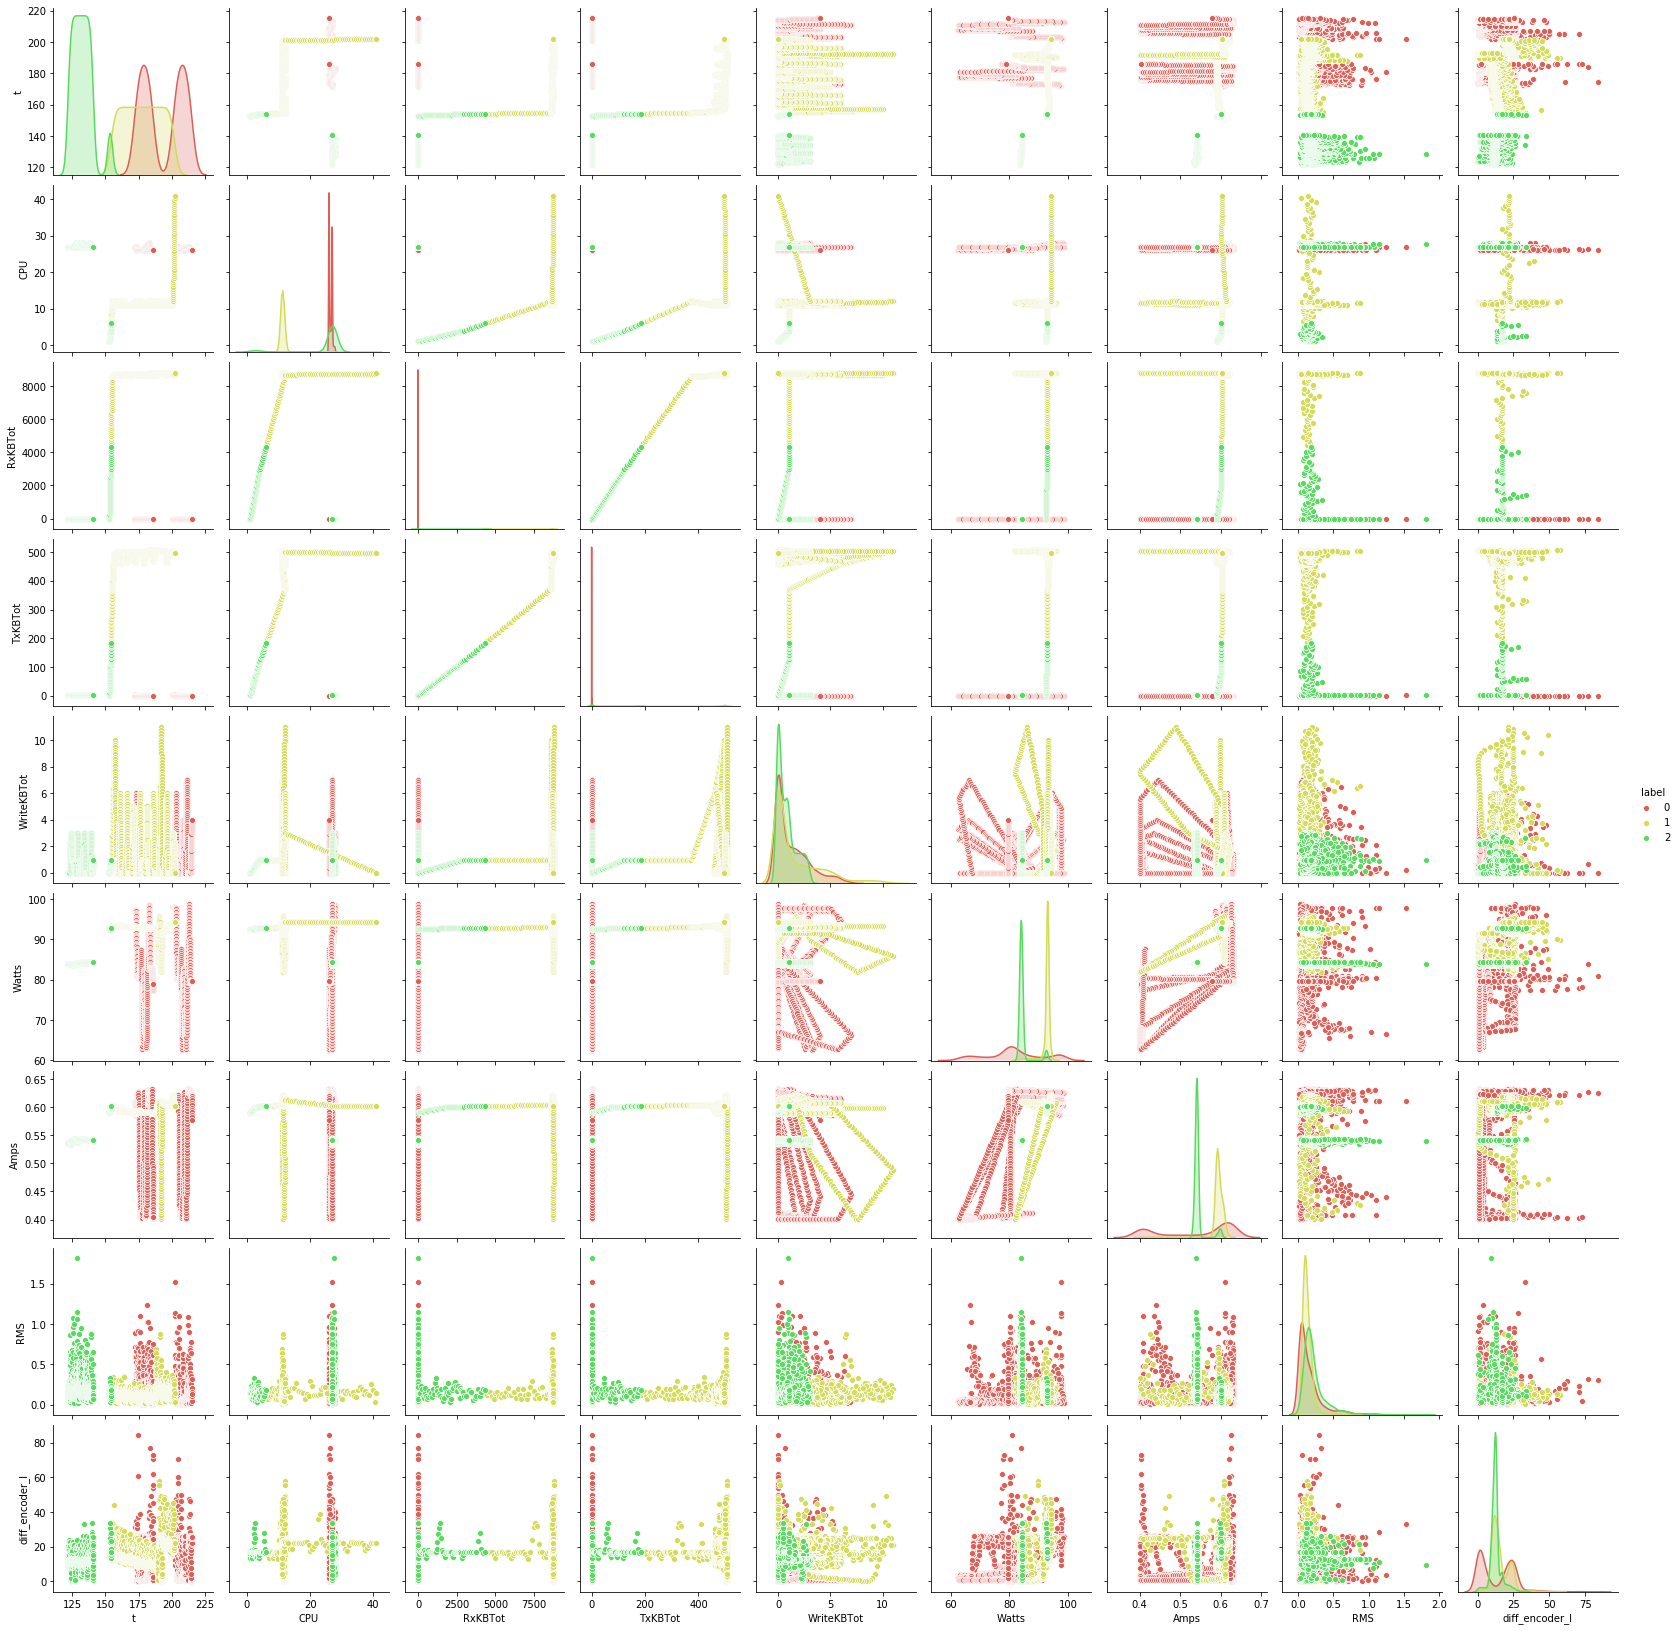

In [6]:
with sns.color_palette("hls", 6):
    sns.pairplot(anomaly.iloc[:,[0,1,2,3,4,5,6,7,8,10]], hue='label')

In [21]:
normal.mean()

t                  173.063281
CPU                 18.942756
RxKBTot           4333.229184
TxKBTot            244.369484
WriteKBTot           1.369172
Watts               87.776590
Amps                 0.566919
RMS                  0.159151
diff_encoder_l      14.446373
flag                 1.000000
dtype: float64

In [14]:
first_class = anomaly.loc[anomaly['label'] == 0, :]
first_class.mean()
#command_injection

t                 193.500000
CPU                26.500000
RxKBTot             0.375535
TxKBTot             0.072040
WriteKBTot          1.285307
Watts              81.600295
Amps                0.538862
RMS                 0.161556
diff_encoder_l     13.631542
flag                1.000000
label               0.000000
dtype: float64

In [11]:
second_class = anomaly.loc[anomaly['label'] == 1, :]
second_class.mean()
#DOS high trafic rate

t                  178.130000
CPU                 11.634430
RxKBTot           8665.789154
TxKBTot            488.974456
WriteKBTot           1.659338
Watts               92.736199
Amps                 0.592848
RMS                  0.129597
diff_encoder_l      15.681487
flag                 1.000000
label                1.000000
dtype: float64

In [12]:
third_class = anomaly.loc[anomaly['label'] == 2, :]
third_class.mean()
#malware_control

t                 132.874320
CPU                25.705108
RxKBTot           120.712032
TxKBTot             6.093688
WriteKBTot          0.801775
Watts              84.636174
Amps                0.544647
RMS                 0.225426
diff_encoder_l     12.664265
flag                1.000000
label               2.000000
dtype: float64

In [ ]:
X.iloc[:,[0,1,2,3,4,5]]

In [ ]:
x_corr = X.corr()
x_corr